In [14]:
import csv
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def get_data(filename):
    with open(filename, mode = 'r') as file:
        csv_reader = csv.reader(file)

        line_count = 0
        headers = []
        data = []

        for row in csv_reader:
            if line_count == 0:
                headers = row
            else:
                row = [int(row[i]) for i in range(len(row))]
                data.append(row)
            line_count += 1

        print(f'Processed {line_count - 1} lines of {filename}.')
    return headers, data

In [16]:
def convert_image(image):
    newImage = [[0 for i in range(28)] for i in range(28)]
    
    for pixel in range(len(image)):
        y = pixel // 28
        x = pixel % 28
        newImage[y][x] = image[pixel]

    return newImage

def convert_data(dataset):
    converted_data = []
    
    for row in dataset:
        converted_data.append(convert_image(row))
    
    return converted_data

In [17]:
def calc_output(data, model):
    prediction = model.predict(data)
    output = []
    
    for i in range(len(prediction)):
        maximum = max(prediction[i])
        for j in range(len(prediction)):
            if prediction[i][j] == maximum:
                output.append((i+1, j))
                break
            
    return output

def output_data(data, model, filename):
    output = calc_output(data, model)

    with open(filename, mode = 'w', newline='') as file:
        csv_writer = csv.writer(file, dialect='excel')
        csv_writer.writerow(["ImageId","Label"])
        csv_writer.writerows(output)

        print(f"Outputted data to {filename}.")

In [18]:
train_total = get_data("train.csv")[1]
test_total = get_data("test.csv")[1]

Processed 42000 lines of train.csv.
Processed 28000 lines of test.csv.


In [19]:
X_train = np.array(convert_data([row[1:] for row in train_total]))
y_train = to_categorical(np.array([row[0] for row in train_total]))

X_test = np.array(convert_data(test_total))

In [20]:
model = keras.Sequential()
model.add(Conv2D(64, kernel_size=4, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=5, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(X_train, y_train, validation_split=0.1, epochs=3)

Epoch 1/3
1182/1182 [==============================] - 42s 35ms/step - loss: 0.2899 - accuracy: 0.9421 - val_loss: 0.1063 - val_accuracy: 0.9702
Epoch 2/3
1182/1182 [==============================] - 38s 32ms/step - loss: 0.0766 - accuracy: 0.9771 - val_loss: 0.0770 - val_accuracy: 0.9740
Epoch 3/3
1182/1182 [==============================] - 37s 31ms/step - loss: 0.0576 - accuracy: 0.9821 - val_loss: 0.0955 - val_accuracy: 0.9769


In [23]:
save_model_location = 'digit-recognition-kernel-45.keras'
model.save(save_model_location)
print(f'Saved model at {save_model_location}.')

Saved model at digit-recognition-kernel-45.keras.


In [24]:
retrieve_model_location = save_model_location
model = keras.models.load_model(retrieve_model_location)

In [25]:
output_data_location = 'test_output.csv'
output_data(X_test, model, output_data_location)

875/875 [==============================] - 10s 11ms/step
Outputted data to test_output.csv.


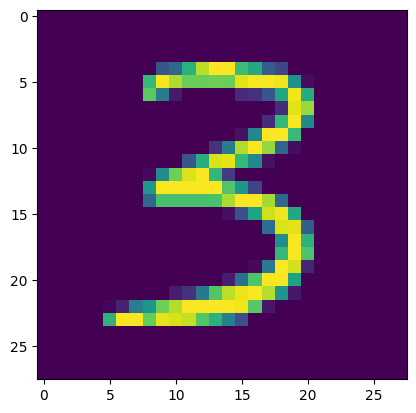

In [26]:
image_id = 10
plt.imshow(X_test[image_id-1])